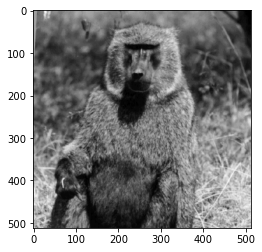

In [10]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data, load_gif_data
from core.utils import Mask

import numpy as np
import matplotlib.pyplot as plt


DATA_DIR = "imgs/validation"
img = load_gif_data(DATA_DIR)[0] / 255

plt.imshow(img, cmap='gray')

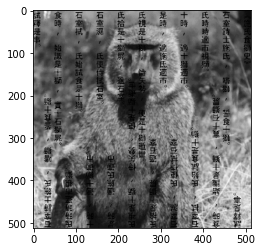

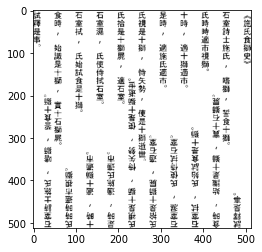

In [11]:
MODE = "text"
mask = Mask(mode=MODE, prcnt=0.5)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

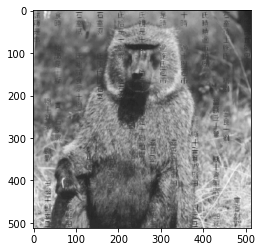

In [12]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

iteration 29 | error 3.55 | psnr 43.17 | ssim 0.99 | time 4.8249


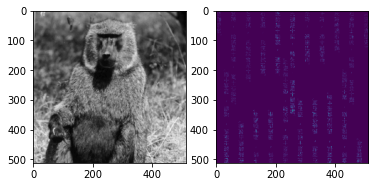

In [14]:
from core.admm import ADMM

rho = 0.0003942568208707973	
tau = 1.2066060923037498e-05	
lambd = 0.0001622080674007667

admm = ADMM()

    
estimated = admm.restore(corrupted, mask, sol=img, iters=30, rho=rho, tau=tau, lambd=lambd)


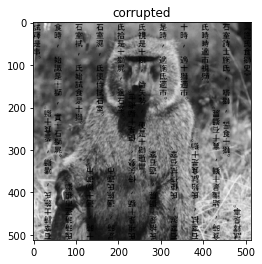

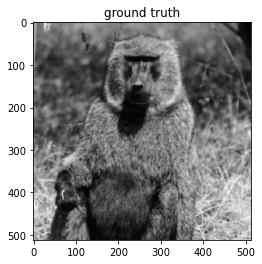

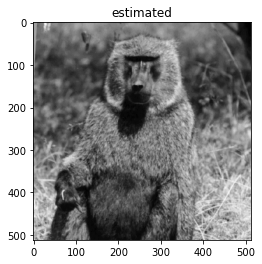

In [15]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()

In [ ]:
# ! pip install bm3d